<a href="https://colab.research.google.com/github/juanmed/detectron2_instance_segmentation_demo/blob/master/custom_COCO_dataset_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imgaug
!pip install gdown

In [2]:
# Download coco test set
import gdown
import shutil
url = 'https://drive.google.com/uc?id=1IZpWoEfXUndLCVs0KWVnJxJuH0klxKUY'
output = 'test.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1IZpWoEfXUndLCVs0KWVnJxJuH0klxKUY
To: /content/test.zip
213MB [00:02, 82.0MB/s]


'test.zip'

In [3]:
!unzip test.zip > /dev/null

In [4]:
%%bash
mv skku_unloading_coco_test/trainval.json skku_unloading_coco_test/images

In [5]:
!mkdir shapes
!mv skku_unloading_coco_test/images/* shapes
!mv shapes/trainval.json shapes/annotations.json

In [6]:
!mkdir output
!pip install clodsa

     |████████████████████████████████| 5.7MB 6.6MB/s 
     |████████████████████████████████| 276kB 36.5MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.42-py2.py3-none-any.whl size=72142 sha256=edcc7d957076b247c1c2d0f7cb7d6120156d2a633e50060a2b89101d94d1e26f
  Stored in directory: /root/.cache/pip/wheels/98/7c/f5/4caa95c8cf6a4ed959de7133a5a623ce0c9c4d134e57431204
  Created wheel for commentjson: filename=commentjson-0.9.0-cp37-none-any.whl size=12087 sha256=442e200f4cac6a498e800baf2c537f49aac0c1a66ef7d4bc82be982542459dd4
  Stored in directory: /root/.cache/pip/wheels/0d/18/46/8da734185b844fc754de60da2c162fc15f7acdacfd4621144e
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62514 sha256=7f47b7b1616b644a4f854a274c1b7e5c71c8116eafaeb5c10bb54719404027b9
  Stored in directory: /root/.cache/pip/wheels/01/a2/30/ebae6ffa73cf3aa1c972a24d4c78388afd910f91e43bf554aa
Successfully built clodsa commentjson lark-parser


In [7]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import cv2
%matplotlib inline

In [53]:
PROBLEM = "instance_segmentation"
ANNOTATION_MODE = "coco"
INPUT_PATH = "shapes"
GENERATION_MODE = "linear"
OUTPUT_MODE = "coco"
OUTPUT_PATH= "output/"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})
transformer = transformerGenerator(PROBLEM)

#for angle in [35]:
#    rotate = createTechnique("rotate", {"angle" : angle})
#    augmentor.addTransformer(transformer(rotate))

#flip0 = createTechnique("flip",{"flip":0})
#flip1 = createTechnique("flip",{"flip":1})
#flipm1 = createTechnique("flip",{"flip":-1})
#augmentor.addTransformer(transformer(flip0))
#augmentor.addTransformer(transformer(flip1))
#augmentor.addTransformer(transformer(flipm1))

#blur = createTechnique("blurring", {"ksize" : 5})
#augmentor.addTransformer(transformer(blur))

#gamma = createTechnique("gamma",{"gamma":1.5})
#augmentor.addTransformer(transformer(gamma))

#sp = createTechnique("salt_and_pepper", {"low" : 0,"up":75})
#augmentor.addTransformer(transformer(sp))

#for shearval in range(1,2,1):
shear = createTechnique("shearing", {"a":0.5})
augmentor.addTransformer(transformer(shear))


#for i in range(10,300,30):
#  for j in range(10,400,40):
#    t = createTechnique("translation", {"x":i,"y":j})
#    augmentor.addTransformer(transformer(t))



In [54]:
augmentor.applyAugmentation()

In [55]:
#!rm output/*

In [56]:
!pip install pycocotools

In [57]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [58]:
image_directory = 'output/'
annotation_file = 'output/annotation.json'
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!


In [59]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
sack pouch box icebox

Custom COCO supercategories: 
sack pouch box icebox


In [60]:
category_ids = example_coco.getCatIds(catNms=['circle'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

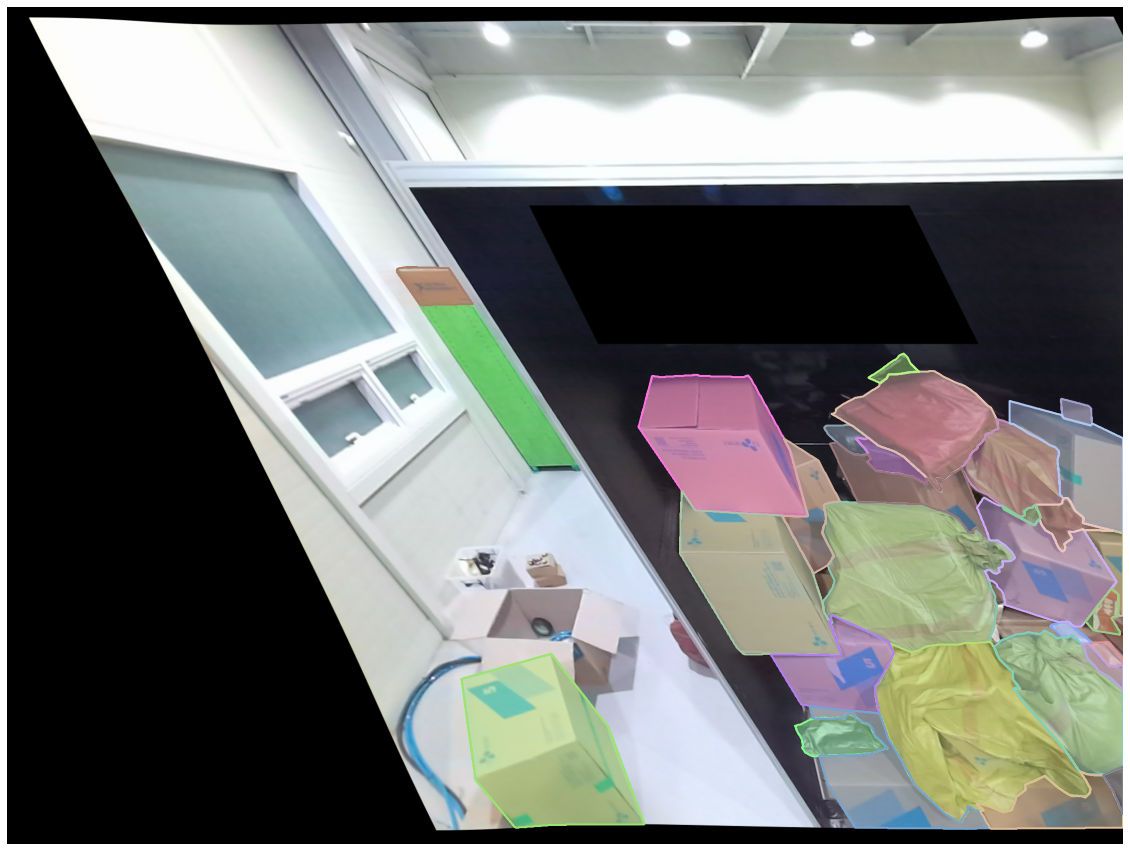

In [63]:
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (20.0, 20.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [62]:
!zip -r shapes.zip output
from google.colab import files
files.download('shapes.zip')

  adding: output/ (stored 0%)
  adding: output/0_data_2020-11-16-15-17-27_cam0_rgb_image_rect_color.png (deflated 4%)
  adding: output/0_data_2020-11-16-16-56-58_cam0_rgb_image_rect_color.png (deflated 4%)
  adding: output/0_data_2020-11-16-15-32-48_cam1_rgb_image_rect_color.png (deflated 5%)
  adding: output/0_data_2020-11-16-15-24-54_cam1_rgb_image_rect_color.png (deflated 5%)
  adding: output/0_27-11-2020-18-08-45_cam0_rgb_rect_color.png (deflated 4%)
  adding: output/0_box5_nfov_aligned2_right255_2020-10-27-14-53-25_rgb_image_rect_color.png (deflated 4%)
  adding: output/0_27-11-2020-18-18-03_cam0_rgb_rect_color.png (deflated 4%)
  adding: output/0_data_2020-11-16-15-12-13_cam0_rgb_image_rect_color.png (deflated 4%)
  adding: output/0_27-11-2020-18-19-29_cam3_rgb_rect_color.png (deflated 3%)
  adding: output/0_data_2020-11-16-16-01-46_cam0_rgb_image_rect_color.png (deflated 4%)
  adding: output/0_01-12-2020-16-42-32_cam2_rgb_rect_color.png (deflated 4%)
  adding: output/0_27-11-202

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>